# Importando bibliotecas - Reproduzido com alterações

In [74]:
#Projeto para predizer se um funcionário tende ou não a deixar uma empresa, com Redes Neurais, Regressão Logística, Árvore de Decisão
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import numpy                 as np
import tensorflow            as tf
from sklearn.preprocessing   import RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics         import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from sklearn.tree            import DecisionTreeClassifier
import pylab
import pickle           
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import MinMaxScaler
from sklearn import svm
from sklearn.neural_network  import MLPClassifier
%matplotlib inline

##  Definição de funções aqui

In [80]:
def tamanhoGrafico():
    pylab.rcParams['figure.figsize'] = (18.0, 18.0)
    
    
#Com a construção de PIPELINES, nosso código fica mais versátil,e fica mais eficiente no quesito de mudanças de parâmetros
#dos classificadores, também como a  manutenção ou adição de mais algoritmos
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

##  Carregando banco de dados

In [5]:
data = pd.read_csv('rh-dados.csv')

# 1.0 DESCRIÇÃO DOS DADOS

In [6]:
df1 = data.copy()

In [7]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
cols_old = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

minuscula = lambda x: inflection.underscore(x)

cols_new = list(map(minuscula, cols_old))

df1.columns = cols_new

## 1.2. Dimensão dos dados

In [8]:
print ('Numero de linhas: {}'.format(df1.shape[0]))
print ('Numero de colunas: {}'.format(df1.shape[1]))

Numero de linhas: 1470
Numero de colunas: 35


## 1.3. Tipo de dados

In [9]:
df1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## 1.4. Checkando valores nulos

In [10]:
#Por meio desta função, pode-se verificar os valores nulos em cada feature, somando-os.
df1.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 1.5. Descrição Estatística

In [11]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])

cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64'])

In [12]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 1.5.1. Atributos Categóricos

In [13]:
cat_attributes.apply(lambda x: x.unique().shape[0])

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

# 2.0 FEATURE ENGINEERING

In [14]:
df2 = df1.copy()

## 2.2 Perguntas a serem respondidas

**1.** Funcionários mais velhos deveriam ter menos tendêcia a sair da empresa.


**2.** Funcionários com mais tempo de educação deveriam ter uma maior tendência em sair da empresa.


**3.** Funcionários com uma maior distância da empresa deveriam ter uma maio tendência em trocar de empresa.


**4.** Funcionários com uma maior satisfação no trabalho deveria ter uma tendência menor em tocar de empresa.


**5.** Quanto maior o aumento percentual do salário menor deveria ser a tendência de troca de empresa.


**6.** Quanto maior o equilibro da vida profissional menor a tendência de trocar de empresa.


**7.** Quanto mais tempo se passou da ultima promoção maior deveria ser a tendência de trocar de empresa.


**8.** Funcionários com mais anos de trabalho deveriam ter uma tendência menor de torcar de empresa.


**9.** Quanto maior o tempo na função atual menor deveria ser a tendência de trocar de empresa.

## 2.3 Feature Engineering

In [16]:
novos_valores = {'Yes':1, 'No':0}
df2['Attrition'] = df2['Attrition'].map(novos_valores)

# 3.0 FILTRAGEM DE VARIAVEIS

In [17]:
df3 = df2.copy()

## 3.1. Seleção das Colunas

In [19]:
cols_drop = ['EmployeeCount', 'StandardHours']

df3 = df3.drop(cols_drop, axis = 1) #percorre a coluna inteira e dropa

# 4.0 ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

In [20]:
df4 = df3.copy()

## 4.1. Análise Univariada

### 4.1.1. Varíavel Resposta

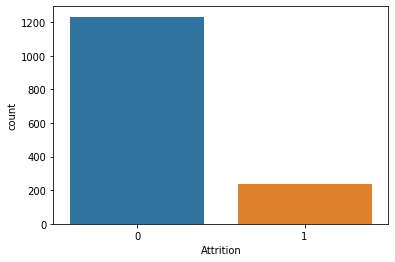

In [21]:
sns.countplot(df4['Attrition']);

### 4.1.2. Variáveis Numéricas

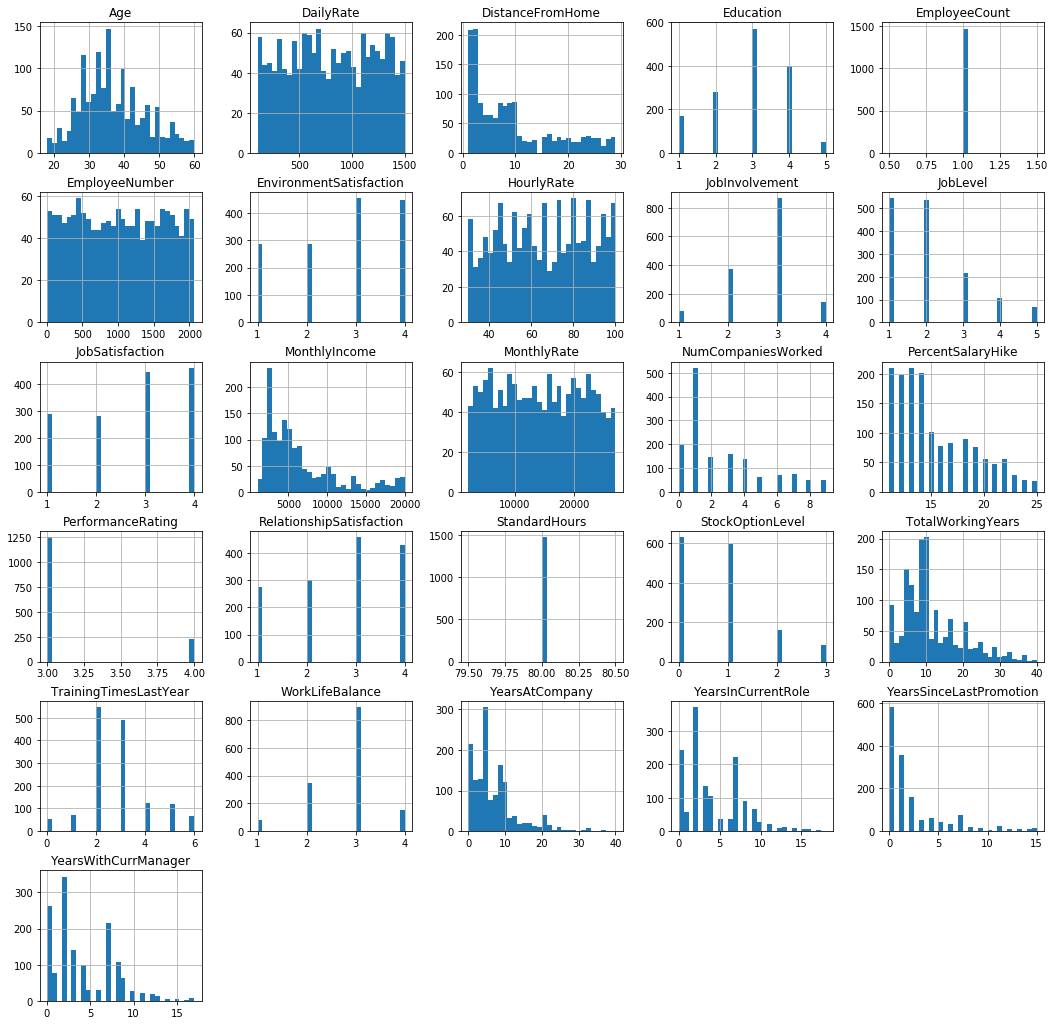

In [22]:
tamanhoGrafico()
num_attributes.hist(bins=30);

## 4.2 Análise Bivariada

### 1. Funcionários mais velhos deveriam ter menos tendêcia a sair da empresa.
**A resposta é verdadeira,** pois funcionários mais velhos deixam menos o trabalho, segundo o histograma abaixo.

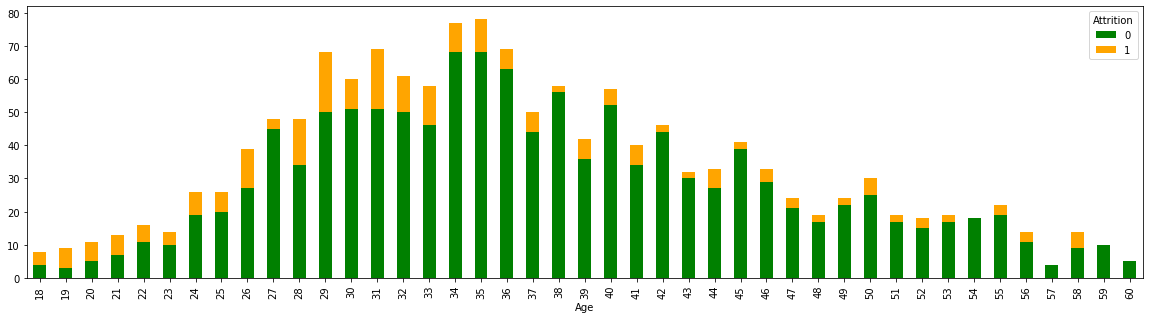

In [24]:
pd.crosstab(df4['Age'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['green', 'orange']);

### 2. Funcionários com mais tempo de educação deveriam ter uma maior tendência em sair da empresa.
**Verdade,** funcionários com maiores estudos deixam mais a empresa

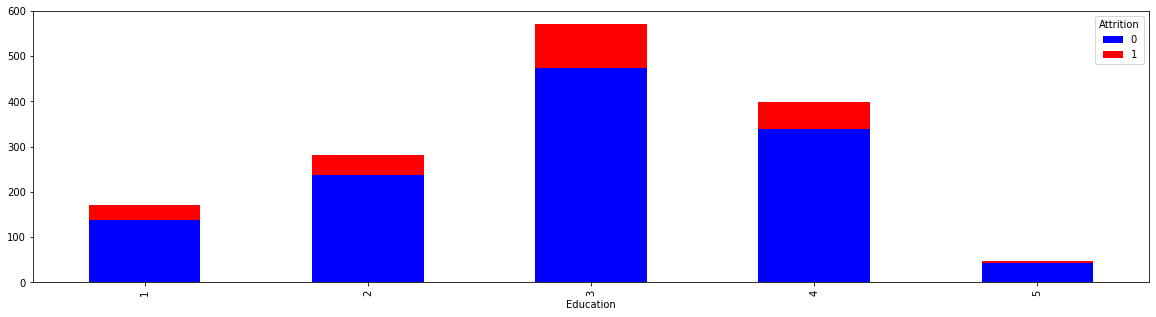

In [39]:
pd.crosstab(df4['Education'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['blue', 'red']);

### 3. Funcionários com uma maior distância da empresa deveriam ter uma maior tendência em trocar de empresa.
**Inconclusivo,** não foi possível analisar

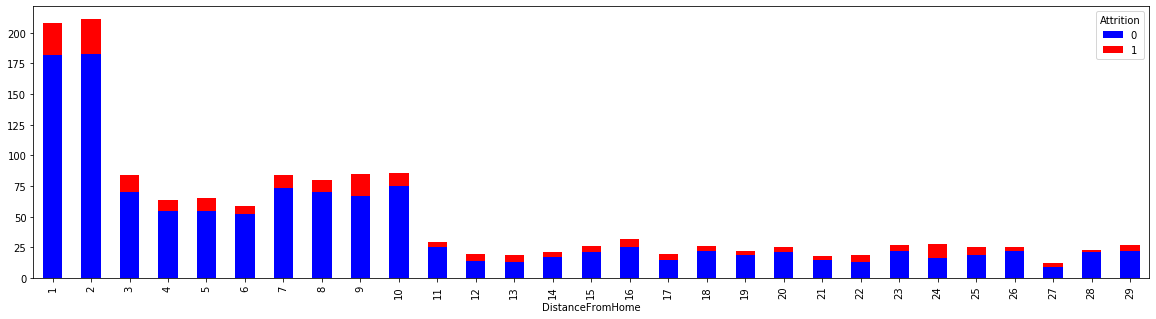

In [42]:
pd.crosstab(df4['DistanceFromHome'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['blue', 'red']);

In [32]:
pearson_coef = stats.spearmanr(df4['DistanceFromHome'], df4['Attrition'])
print(pearson_coef)

SpearmanrResult(correlation=0.0792481860561686, pvalue=0.00236091853445455)


In [36]:
### 3. Funcionários com uma maior satisfação no trabalho deveria ter uma tendência menor em tocar de empresa.
#Pelo coeficiente de correlação e o Pvalor, pode-se inferir que quem mora mais distante do trabalho, tende a deixar mais o emprego.

### 4. Funcionários com uma maior satisfação no trabalho deveria ter uma tendência menor em tocar de empresa.
**Inconclusiva,** não foi possível analisar.

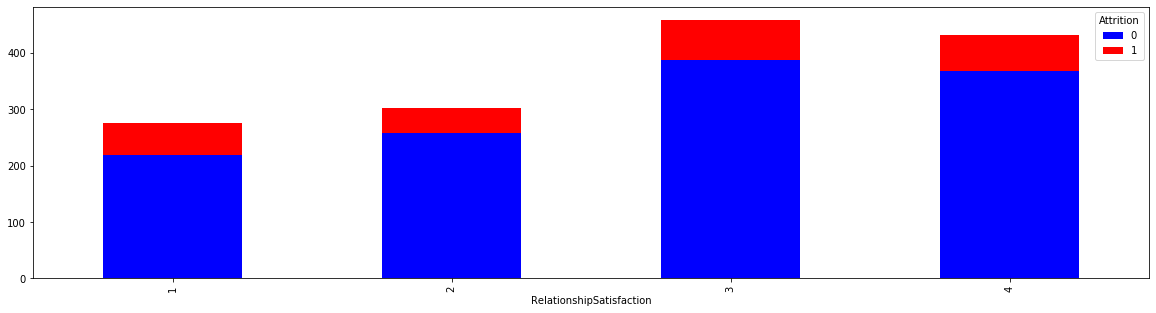

In [41]:
pd.crosstab(df4['RelationshipSatisfaction'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['blue', 'red']);

### 5. Quanto maior o aumento do salário menor deveria ser a tendência de troca de empresa.
**Inconclusivo,** não é possível analisar

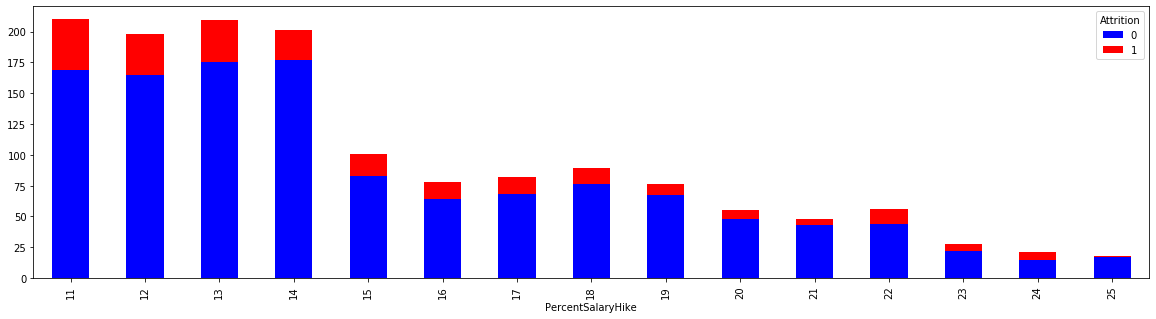

In [43]:
pd.crosstab(df4['PercentSalaryHike'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['blue', 'red']);

### 6. Quanto maior o equilibro da vida profissional menor a tendência de trocar de empresa.
**Verdadeiro,** quanto mais equilibrado, menos deixa a empresa

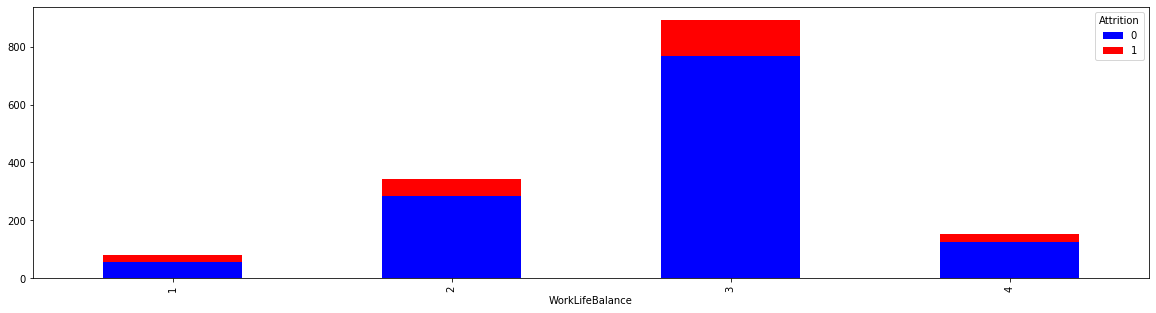

In [44]:
pd.crosstab(df4['WorkLifeBalance'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['blue', 'red']);

### 7. Quanto mais tempo se passou da ultima promoção maior deveria ser a tendência de trocar de empresa.
**Falso,** quanto maior tempo da ultima promoção, menos é a tendência de troca de emprego

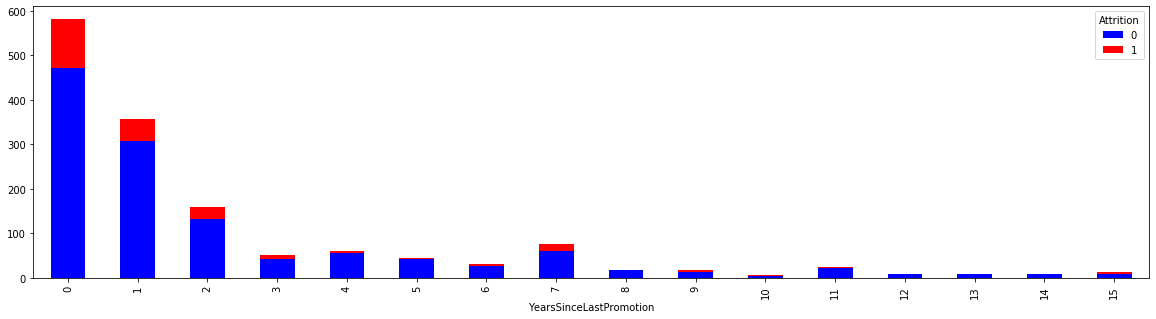

In [45]:
pd.crosstab(df4['YearsSinceLastPromotion'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['blue', 'red']);

### 8. Funcionários com mais anos de trabalho deveriam ter uma tendência menor de torcar de empresa.
**Verdadeira,** quanto mais anos trabalhos, menos vontade há de trocar de empresa

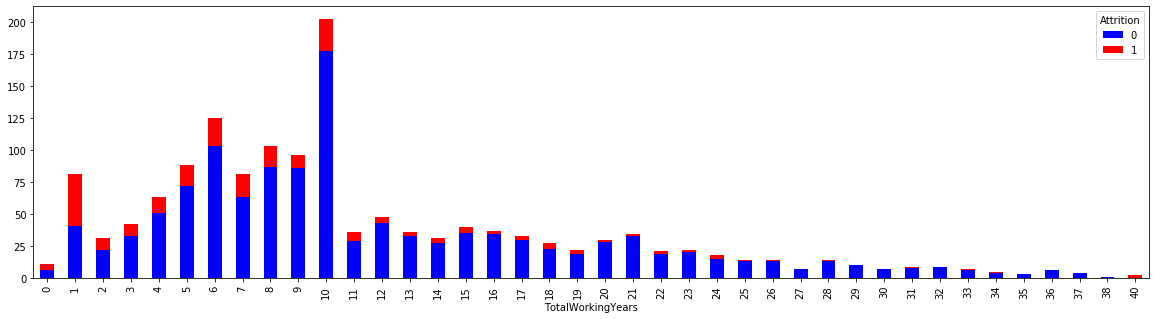

In [46]:
pd.crosstab(df4['TotalWorkingYears'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['blue', 'red']);

### 9. Quanto maior o tempo na função atual menor deveria ser a tendência de trocar de empresa.
**Inconclusivo,** não é possível analisar

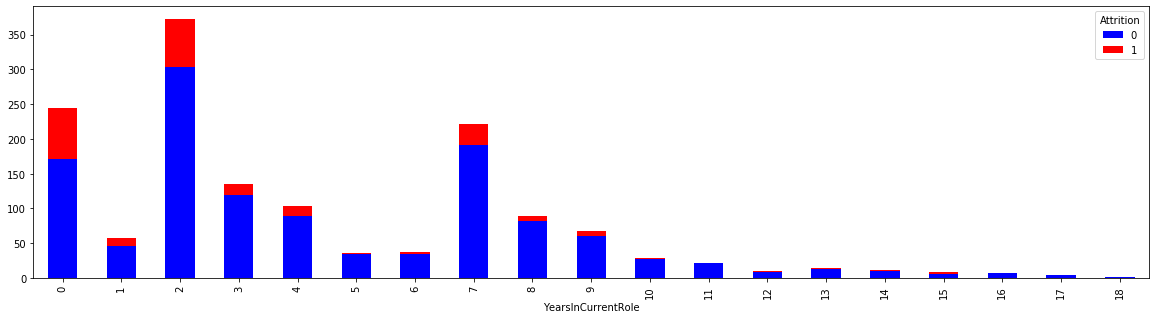

In [47]:
pd.crosstab(df4['YearsInCurrentRole'], df4['Attrition']).plot(kind='bar', stacked=True, figsize=(20,5), color = ['blue', 'red']);

### 4.3. Análise Multivariada

### 4.3.1 Variáveis Numéricas

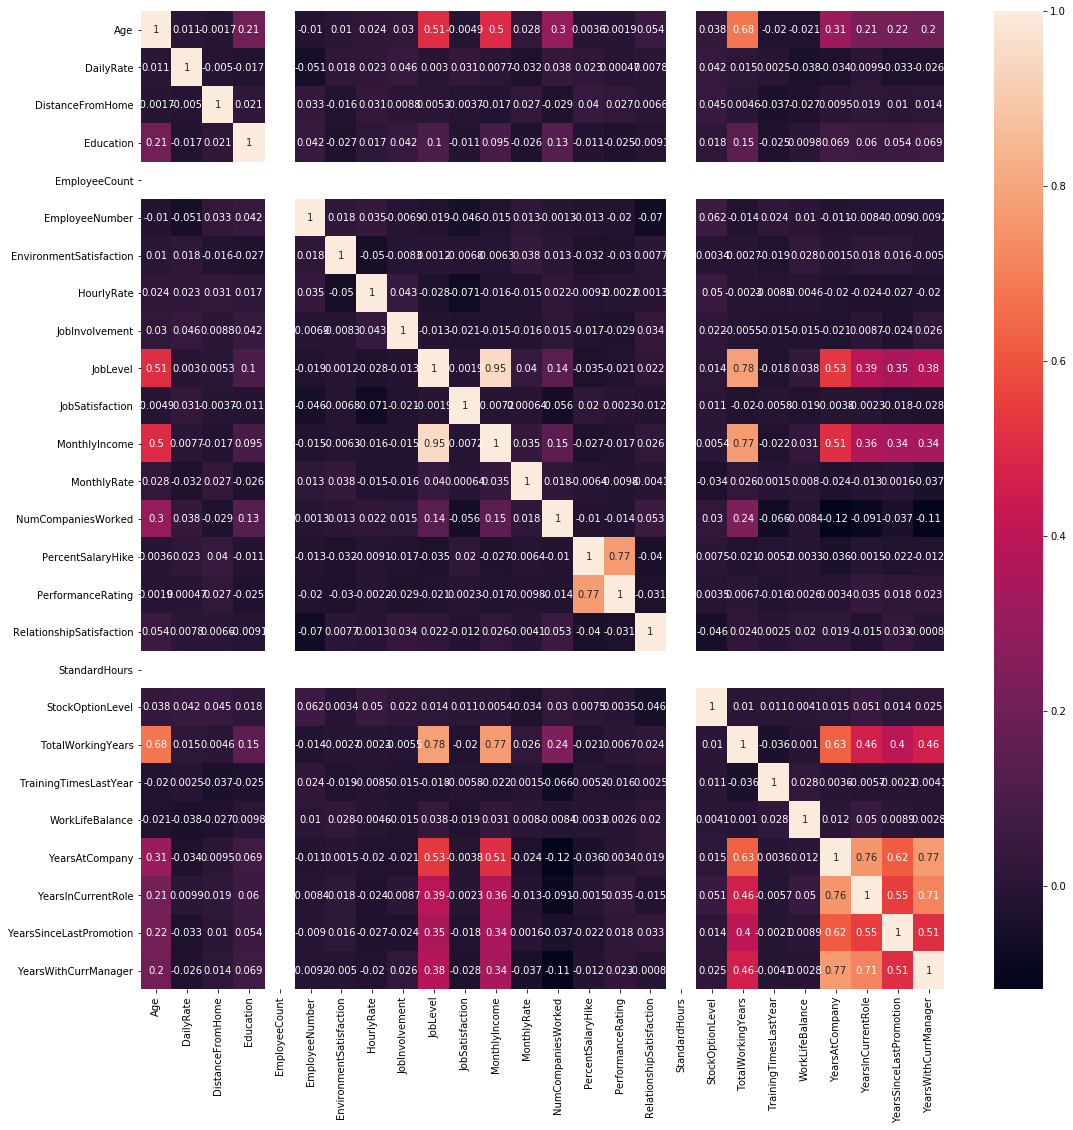

In [48]:
correlacao = num_attributes.corr(method = 'pearson')
sns.heatmap(correlacao, annot = True);

# 5.0 PREPARAÇÃO DOS DADOS

In [49]:
df5 = df4.copy()

## 5.1. Encoding

In [53]:
X_cat = cat_attributes[['BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus']]

onn = OneHotEncoder()

X_cat = onn.fit_transform(X_cat).toarray()

X_cat = pd.DataFrame(X_cat)

X_numerical = num_attributes[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

df = pd.concat([X_numerical, X_cat], axis=1)

In [54]:
df_all = pd.concat( [df, df5['Attrition']], axis=1 )

## 5.3. Rescaling

In [56]:
mms = MinMaxScaler()

x = mms.fit_transform(x)

# 6.0 MODELO DE MACHINE LEARNING

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [82]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(pip_4, X_train, y_train, cv=5)
 
print("Predição")
print("--------------------------")
 
# Construindo a matriz de confusão
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
especificidade = tn / (tn+fp)
sensibilidade = tp/(tp + fn)
acuracia = (tp + tn)/(tp + fp + fn + tn)
print("A especificidade é", especificidade)
print("A acurácia é", acuracia)

Predição
--------------------------
A especificidade é 0.9656565656565657
A acurácia é 0.8511904761904762


## 6.1 Regressão Logística

In [58]:
regr_logist = LogisticRegression()
regr_logist.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = regr_logist.predict(X_test)
accuracy_score(y_test, y_pred)*100

84.35374149659864

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       243
           1       0.65      0.22      0.32        51

    accuracy                           0.84       294
   macro avg       0.75      0.60      0.62       294
weighted avg       0.82      0.84      0.81       294



## 6.2 Random Forest

In [61]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_pred = random_forest.predict(X_test)
accuracy_score(y_test, y_pred)*100

82.99319727891157

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       243
           1       0.54      0.14      0.22        51

    accuracy                           0.83       294
   macro avg       0.69      0.56      0.56       294
weighted avg       0.79      0.83      0.79       294



## 6.3 Decision Tree

In [64]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)*100

77.55102040816327

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       243
           1       0.35      0.33      0.34        51

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.77      0.78      0.77       294



## 6.4. Redes Neurais

In [67]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=30, activation='relu', input_shape=(52, )))
rede_neural.add(tf.keras.layers.Dense(units=30, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=30, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [68]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1590      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 3,481
Trainable params: 3,481
Non-trainable params: 0
_________________________________________________________________


In [69]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [70]:
rede_neural.fit(X_train, y_train, epochs = 200)

Epoch 1/200
1176/1176 [==============================] - 0s 108us/sample - loss: 0.4721 - acc: 0.8418
Epoch 2/200
1176/1176 [==============================] - 0s 29us/sample - loss: 0.4150 - acc: 0.8418
Epoch 3/200
1176/1176 [==============================] - 0s 26us/sample - loss: 0.4003 - acc: 0.8418
Epoch 4/200
1176/1176 [==============================] - 0s 27us/sample - loss: 0.3870 - acc: 0.8418
Epoch 5/200
1176/1176 [==============================] - 0s 27us/sample - loss: 0.3783 - acc: 0.8418
Epoch 6/200
1176/1176 [==============================] - 0s 26us/sample - loss: 0.3638 - acc: 0.8520
Epoch 7/200
1176/1176 [==============================] - 0s 27us/sample - loss: 0.3596 - acc: 0.8580
Epoch 8/200
1176/1176 [==============================] - 0s 28us/sample - loss: 0.3463 - acc: 0.8724
Epoch 9/200
1176/1176 [==============================] - 0s 26us/sample - loss: 0.3363 - acc: 0.8707
Epoch 10/200
1176/1176 [==============================] - 0s 26us/sample - loss: 0.3339 - 

1176/1176 [==============================] - 0s 26us/sample - loss: 0.0157 - acc: 0.9991
Epoch 82/200
1176/1176 [==============================] - 0s 27us/sample - loss: 0.0152 - acc: 0.9991
Epoch 83/200
1176/1176 [==============================] - 0s 26us/sample - loss: 0.0146 - acc: 0.9983
Epoch 84/200
1176/1176 [==============================] - 0s 27us/sample - loss: 0.0148 - acc: 0.9974
Epoch 85/200
1176/1176 [==============================] - 0s 26us/sample - loss: 0.0134 - acc: 0.9983
Epoch 86/200
1176/1176 [==============================] - 0s 29us/sample - loss: 0.0107 - acc: 1.0000
Epoch 87/200
1176/1176 [==============================] - 0s 30us/sample - loss: 0.0096 - acc: 1.0000
Epoch 88/200
1176/1176 [==============================] - 0s 37us/sample - loss: 0.0092 - acc: 1.0000
Epoch 89/200
1176/1176 [==============================] - 0s 25us/sample - loss: 0.0084 - acc: 1.0000
Epoch 90/200
1176/1176 [==============================] - 0s 28us/sample - loss: 0.0077 - acc: 

1176/1176 [==============================] - 0s 24us/sample - loss: 4.0070e-04 - acc: 1.0000
Epoch 160/200
1176/1176 [==============================] - 0s 26us/sample - loss: 3.8844e-04 - acc: 1.0000
Epoch 161/200
1176/1176 [==============================] - 0s 28us/sample - loss: 3.7911e-04 - acc: 1.0000
Epoch 162/200
1176/1176 [==============================] - 0s 28us/sample - loss: 3.7158e-04 - acc: 1.0000
Epoch 163/200
1176/1176 [==============================] - 0s 27us/sample - loss: 3.5647e-04 - acc: 1.0000
Epoch 164/200
1176/1176 [==============================] - 0s 26us/sample - loss: 3.4671e-04 - acc: 1.0000
Epoch 165/200
1176/1176 [==============================] - 0s 24us/sample - loss: 3.3263e-04 - acc: 1.0000
Epoch 166/200
1176/1176 [==============================] - 0s 24us/sample - loss: 3.2351e-04 - acc: 1.0000
Epoch 167/200
1176/1176 [==============================] - 0s 24us/sample - loss: 3.1785e-04 - acc: 1.0000
Epoch 168/200
1176/1176 [==========================

In [49]:
y_pred = rede_neural.predict(X_test)

In [50]:
y_pred = (y_pred >= 0.5)

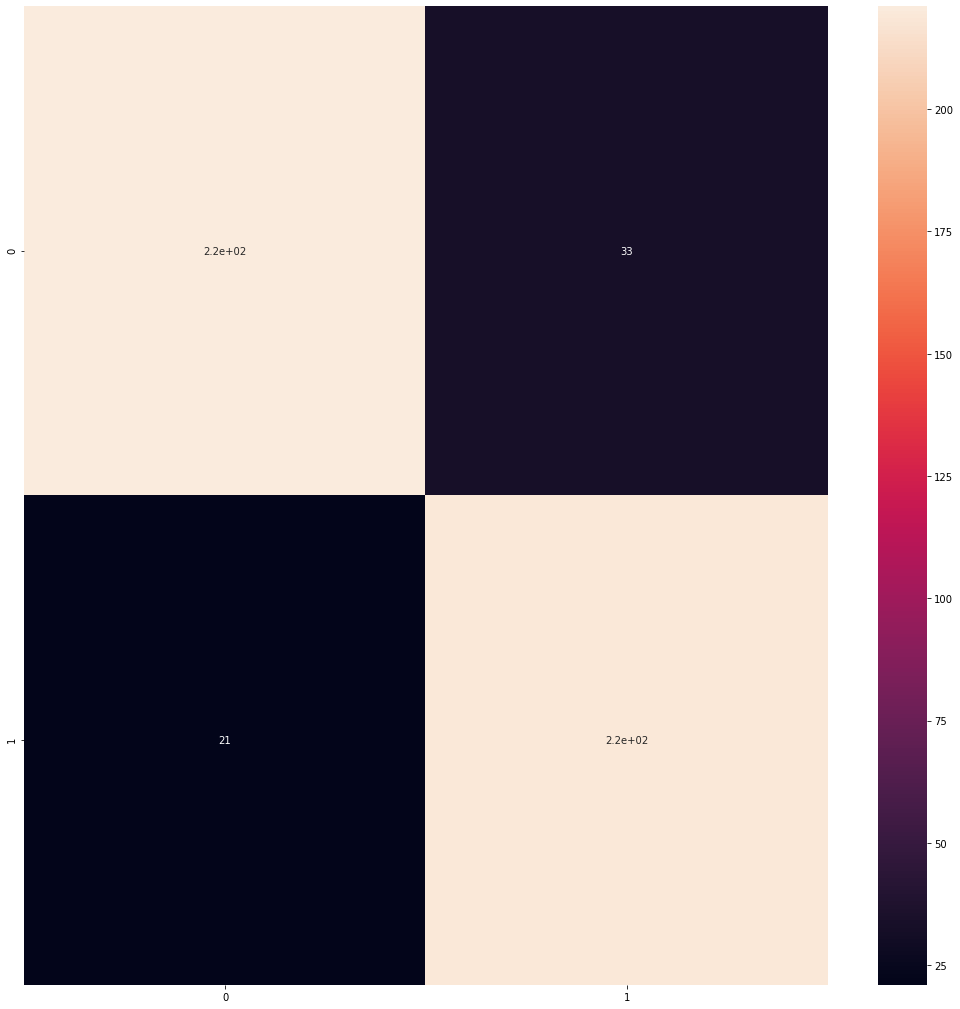

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True);

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       243
           1       0.35      0.33      0.34        51

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.77      0.78      0.77       294



# 7.0 SALVANDO O CLASSIFICADOR

In [ ]:
with open('variaveismodelo.pkl', 'wb') as f:
    pickle.dump([smote, onn, mms, random_forest], f)